Importamos pandas y nuestra clase. A continuación tenemos que iniciar sesión en una cuenta de plot.ly, ya que es necesario para guardar las imágenes.

In [1]:
import pandas as pd, sys
sys.path.append('../')
from ParallelCoordinates import ParallelCoordinates
import plotly.plotly as py

py.sign_in('DemoAccount', '2qdyfjyr7o')

Podemos crear nuestro dataframe de pandas con el csv de iris

In [2]:
df = pd.read_csv('../data/iris.csv')

A continuación creamos un objeto de nuestra clase.

In [3]:
pc = ParallelCoordinates(df)

Ahora seteamos el layout a nuestro gusto y graficamos. En este caso hemos cambiado el color de fondo de blanco (por defecto) a gris claro. En la gráfica hemos personalizado los nombres de las dimensiones con `labels` y los rangos de estas dimensiones con `ranges`.

In [5]:
pc.set_layout(plot_bgcolor='#E5E5E5',
              paper_bgcolor='#E5E5E5')
pc.plot('species',
        labels=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'],
        ranges=[[0,8],[0,8],[0,8],[0,8]])

Ahora podemos guardar la imagen con el método `save`.

In [11]:
pc.save(output_filename='../data/iris.png', image_width=1200, image_height=800)

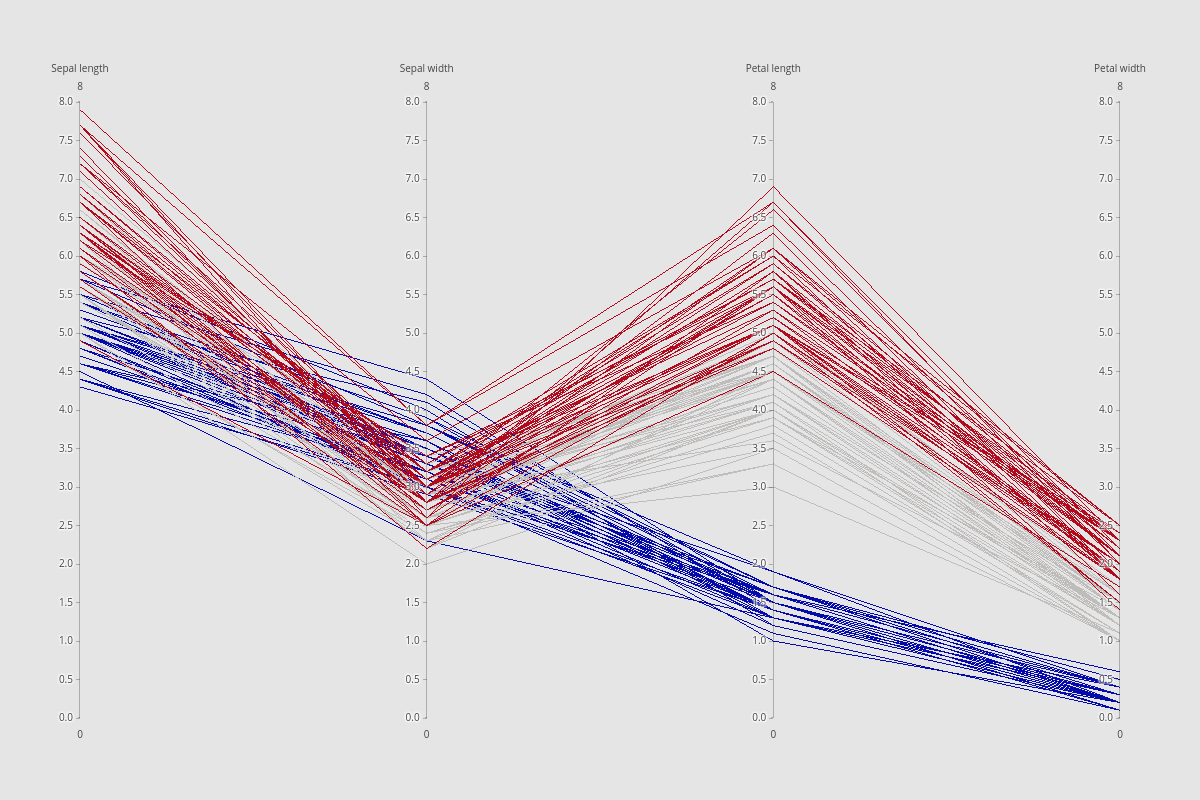

In [12]:
from IPython.display import Image
Image('../data/iris.png')

Ahora vamos a hacer un ejemplo con un ficher FUN.XXXX de M2Align.

In [16]:
fun_df = pd.read_csv('../data/FUN.BB11001.tsv', sep='\t', header=None)
fun_df

,0,1,2,3
0,2.559948,2.083333,89.843750,NaN
1,1.188723,4.040404,87.121212,NaN
2,1.362955,0.000000,91.755319,NaN
3,2.612349,1.041667,89.843750,NaN
4,2.547150,3.030303,87.121212,NaN
5,2.559948,2.083333,89.843750,NaN
6,2.559948,2.083333,89.843750,NaN
7,2.555091,2.884615,82.932692,NaN


Por la forma en la que está construido el fichero tsv, se lee una columna sin valores. Nosotros vamos a reutilizar esa columna para escribir los valores que van a servir como "clase". Van a ser valores del 1 al 8 que harán referencia a cada alineamiento del fichero (cada línea es un alineamiento).

In [21]:
fun_df[3] = pd.Series(fun_df.index + 1, index=fun_df.index)
fun_df

,0,1,2,3
0,2.559948,2.083333,89.843750,1
1,1.188723,4.040404,87.121212,2
2,1.362955,0.000000,91.755319,3
3,2.612349,1.041667,89.843750,4
4,2.547150,3.030303,87.121212,5
5,2.559948,2.083333,89.843750,6
6,2.559948,2.083333,89.843750,7
7,2.555091,2.884615,82.932692,8


In [23]:
pc_fun = ParallelCoordinates(fun_df)
pc_fun.plot(class_column=3,
        labels=['Totally conserved columns', 'Non-gaps percentage', 'Strike score'])

Esta vez, como no le hemos pasado el argumento `ranges` se ha ajustado automáticamente cada una entre el máximo y el mínimo.

In [30]:
pc_fun.save(output_filename='../data/fun.jpeg', image_width=1200, image_height=800)

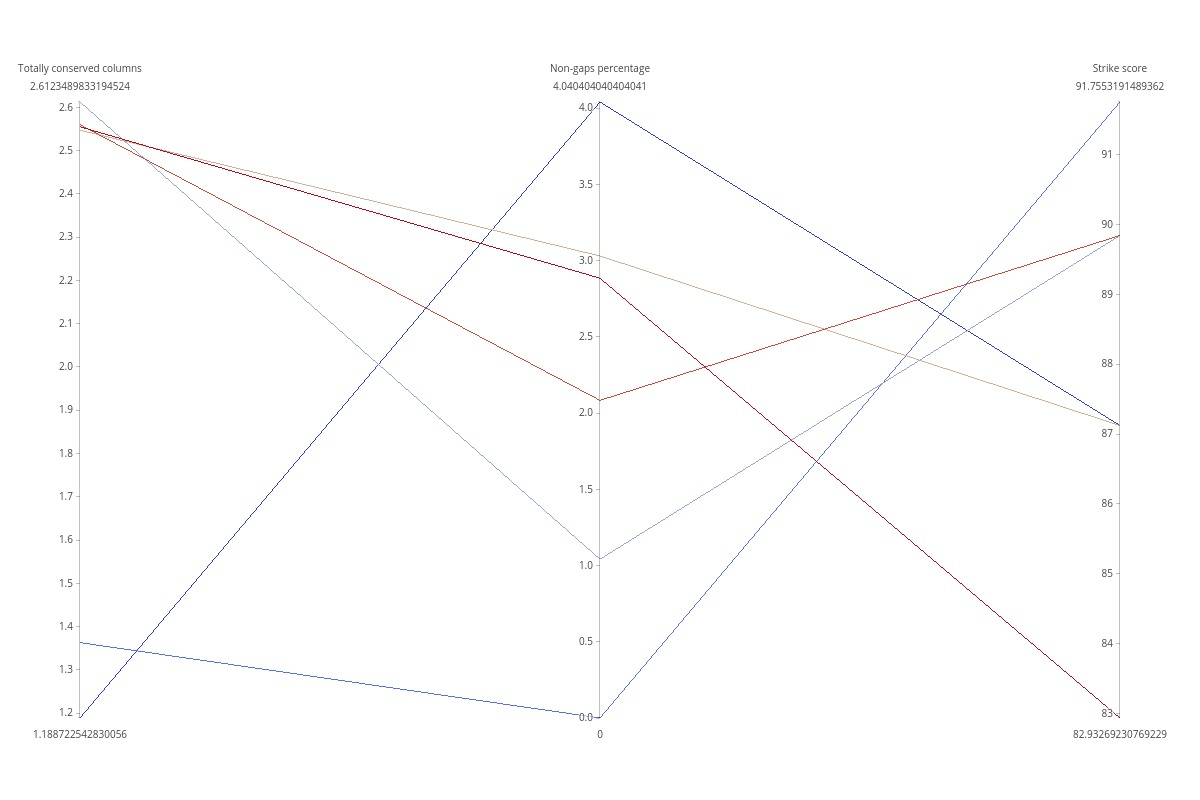

In [31]:
Image('../data/fun.jpeg')

Estamos usando plot.ly, así que si queremos exportar el gráfico a otros formatos distintos a png y jpeg, tenemos que conectarnos con la api de una cuenta Professional de pago. Tendríamos disponibles los formatos SVG, EPS y PDF.